In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [40]:
rain = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [41]:
rain.shape

(8425, 23)

In [42]:
rain.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [43]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [44]:
categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [45]:
numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']

#rain.select_dtypes(include=['float64','int64']).columns 

print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']




A high number of unique values within a feature column is known as high cardinality.

High cardinality may pose some serious problems in the machine learning model.

If a feature column as high cardinality, when we use encoding techniques, then that may cause a significant increase number of dimensions, which is not a good for machine learning problems.

If there is high cardinality in feature column, then:

Employ Feature Engineering to extract new features from the feature which possess high cardinality. (or)

Simply drop the feature, if that feature doesn't add value to model.

In [46]:
for each_feature in categorical_features:
    print("Cardinality(no. of unique values) of {} are: {}".format(each_feature,len(rain[each_feature].unique())))

Cardinality(no. of unique values) of Date are: 3004
Cardinality(no. of unique values) of Location are: 12
Cardinality(no. of unique values) of WindGustDir are: 17
Cardinality(no. of unique values) of WindDir9am are: 17
Cardinality(no. of unique values) of WindDir3pm are: 17
Cardinality(no. of unique values) of RainToday are: 3
Cardinality(no. of unique values) of RainTomorrow are: 3


In [47]:
rain['Date'] = pd.to_datetime(rain['Date'])

In [48]:
rain['Date'].dtype

dtype('<M8[ns]')

In [49]:
rain['year'] = rain['Date'].dt.year
rain['month'] = rain['Date'].dt.month
rain['day'] = rain['Date'].dt.day

In [50]:
rain.drop('Date', axis = 1, inplace = True)

In [51]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [52]:
# categorical data: 

categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 6
Categorical Features:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [53]:
# Numerical Features:

numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
#rain.select_dtypes(include=['float64','int64']).columns 
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 19
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month', 'day']


In [54]:
rain[categorical_features].isnull().sum()

Location          0
WindGustDir     991
WindDir9am      829
WindDir3pm      308
RainToday       240
RainTomorrow    239
dtype: int64

In [55]:
# list of categorical features which has null values:

categorical_features_with_null = [feature for feature in categorical_features if rain[feature].isnull().sum()]

In [56]:
# Filling the missing(Null) categorical features with most frequent value(mode)

for each_feature in categorical_features_with_null:
    mode_val = rain[each_feature].mode()[0]
    rain[each_feature].fillna(mode_val,inplace=True)

In [57]:
rain[categorical_features].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [58]:
# checking null values in numerical features

rain[numerical_features].isnull().sum()

MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustSpeed     991
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
year                0
month               0
day                 0
dtype: int64

<AxesSubplot:>

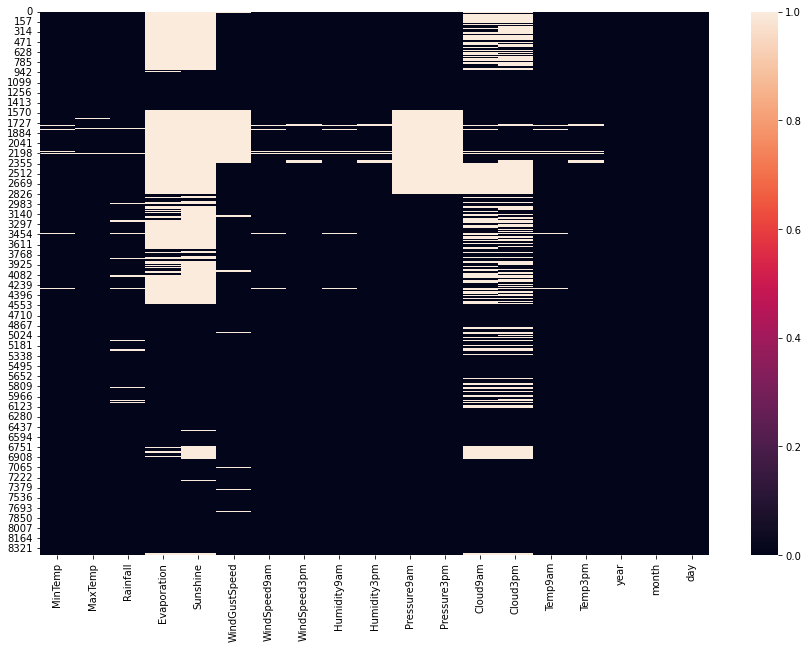

In [59]:
plt.figure(figsize=(15,10))
sns.heatmap(rain[numerical_features].isnull(),linecolor='white')

<AxesSubplot:>

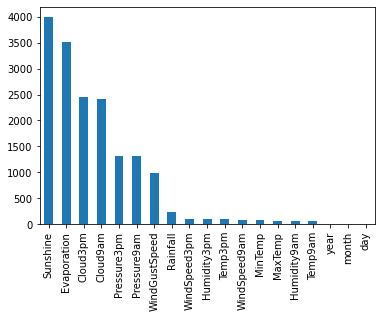

In [60]:
rain[numerical_features].isnull().sum().sort_values(ascending = False).plot(kind = 'bar')

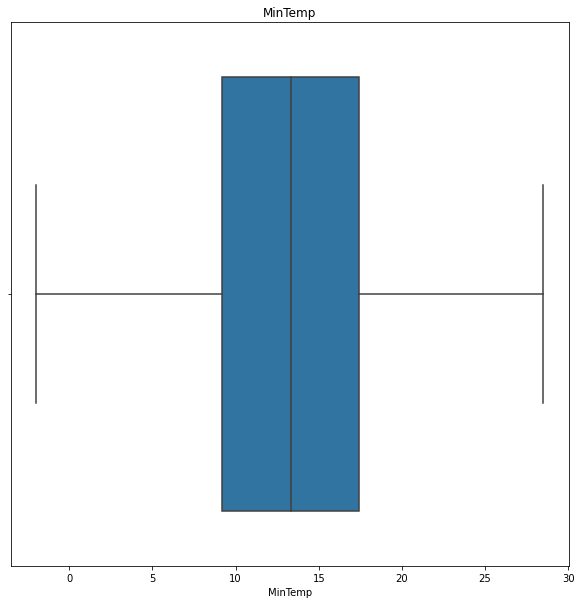

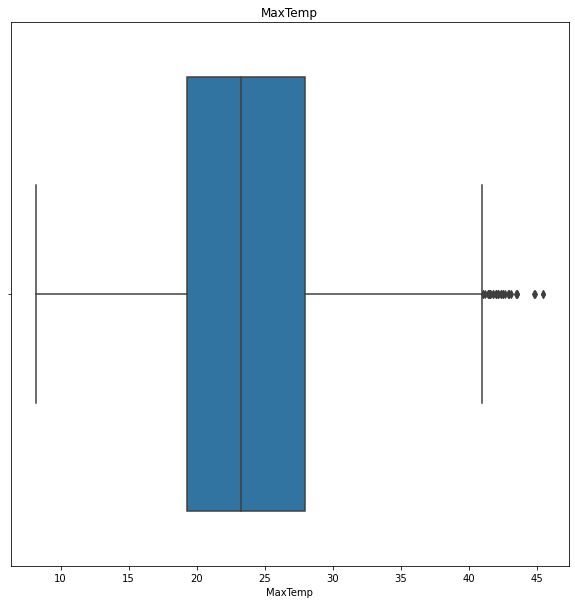

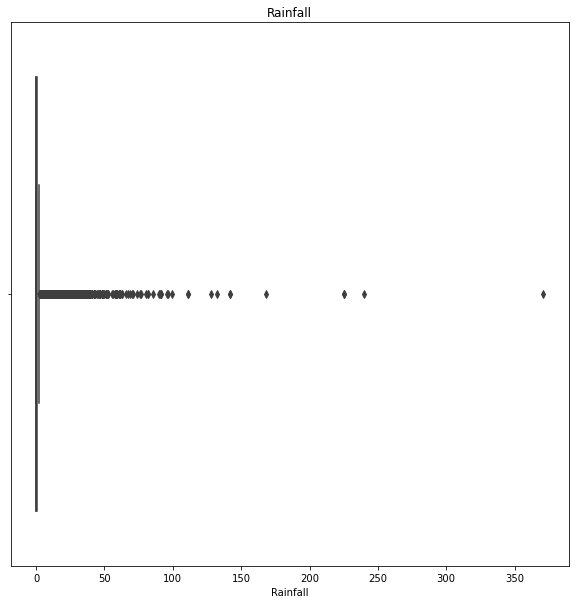

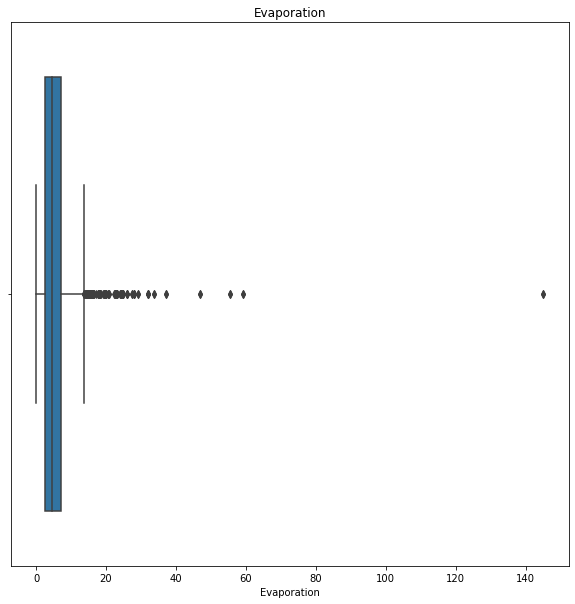

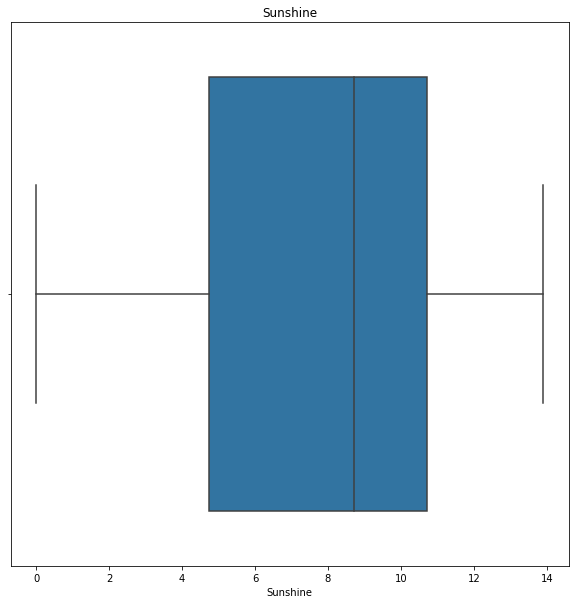

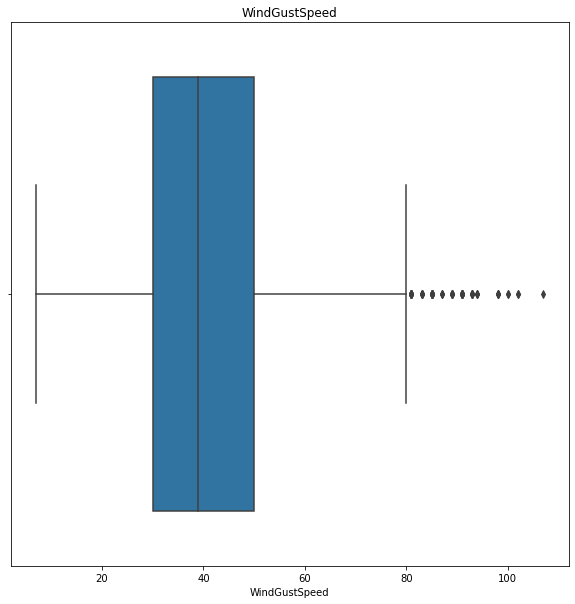

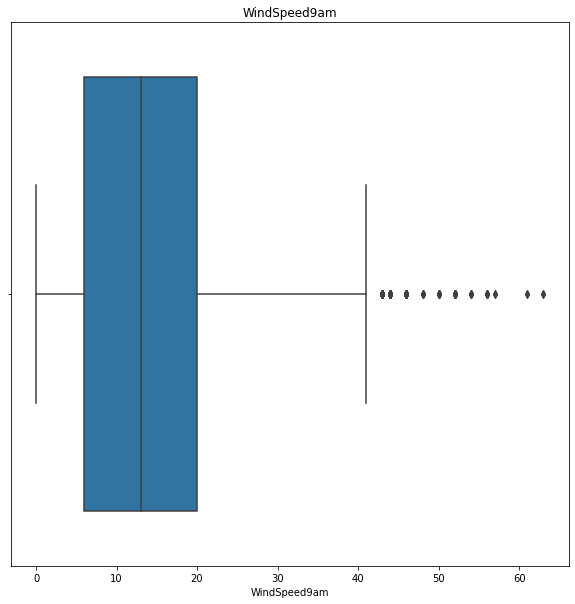

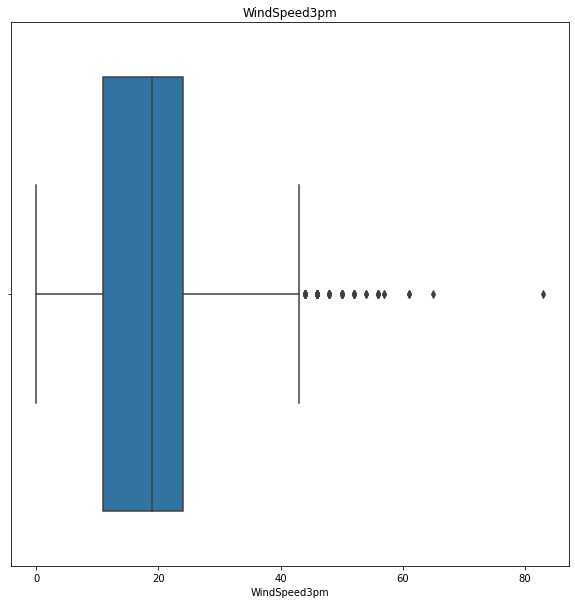

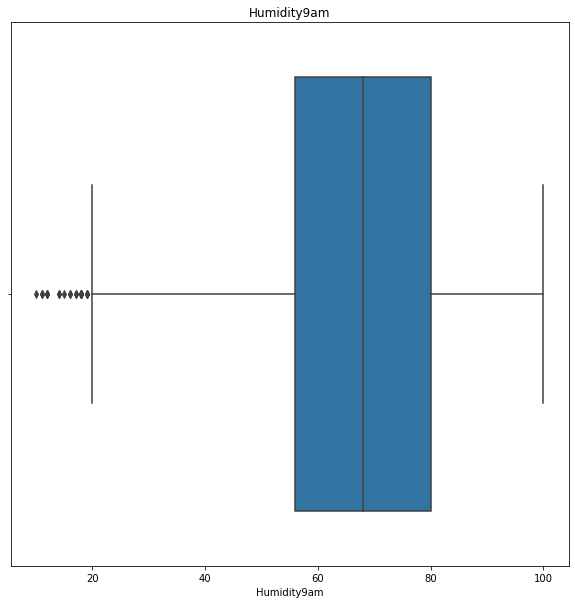

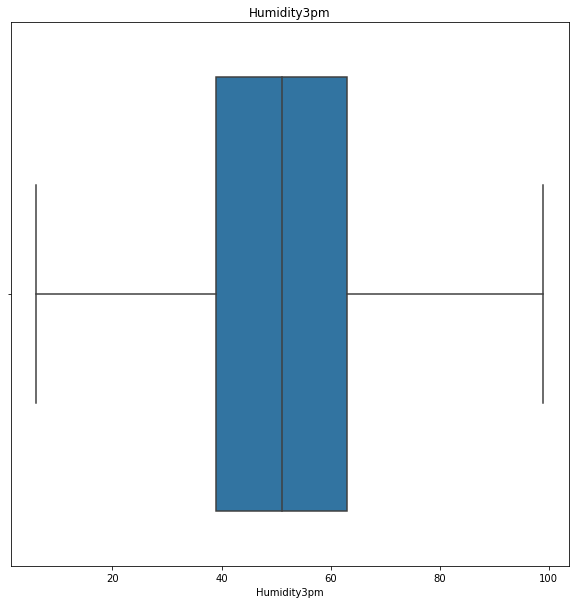

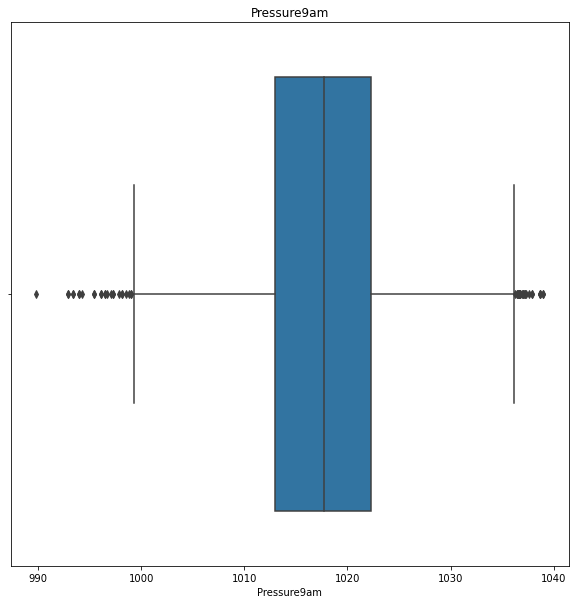

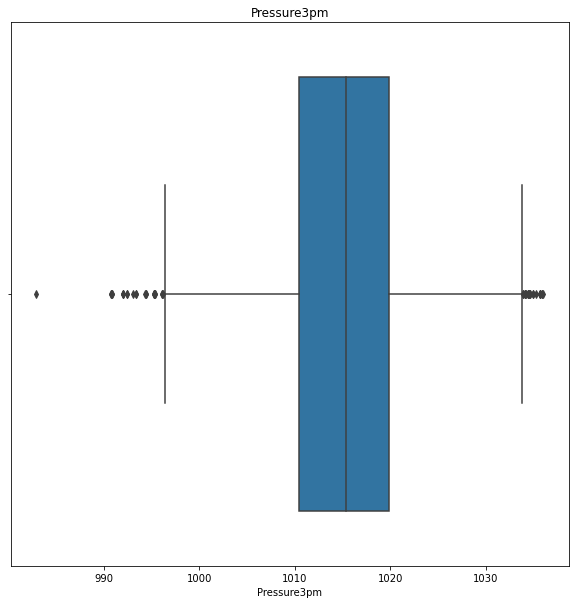

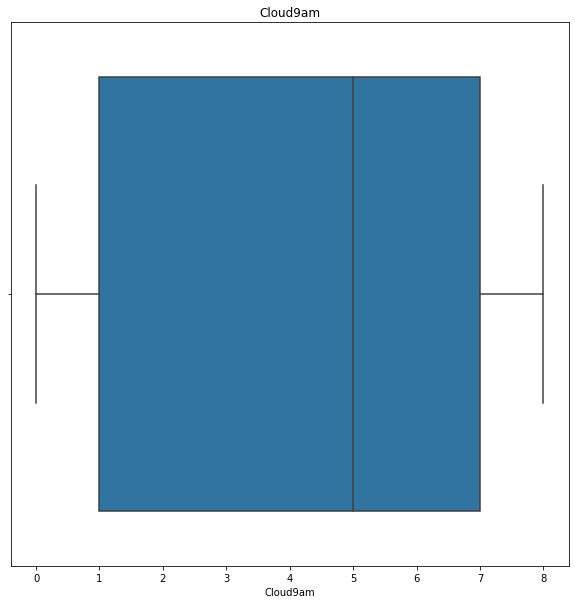

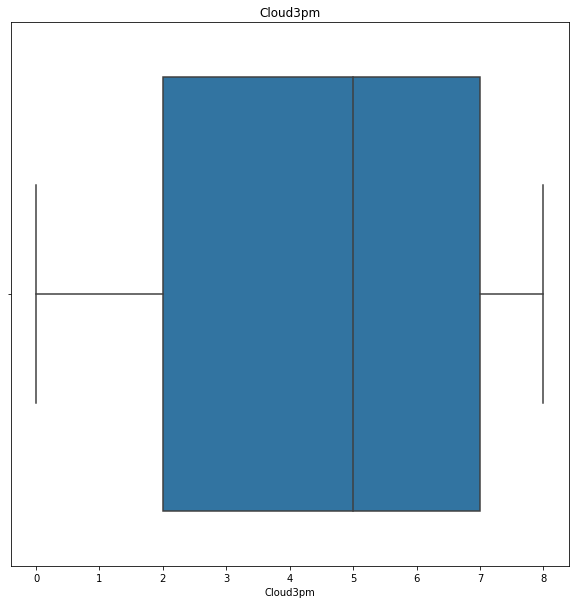

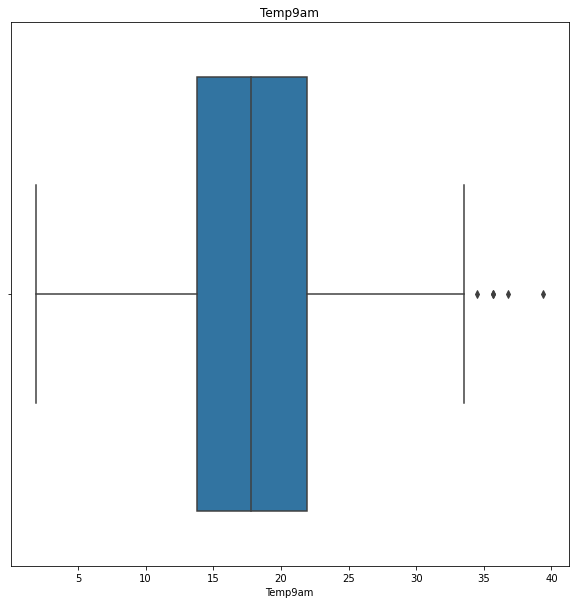

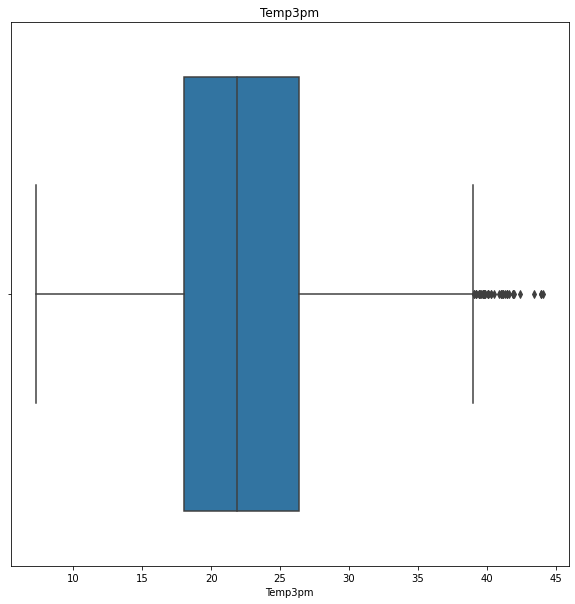

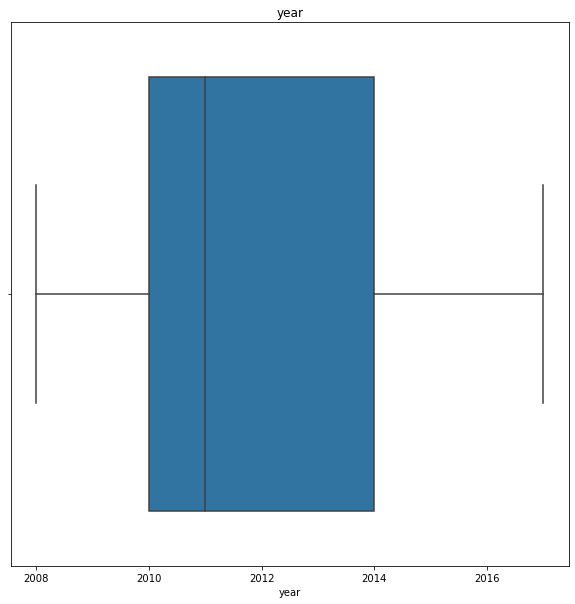

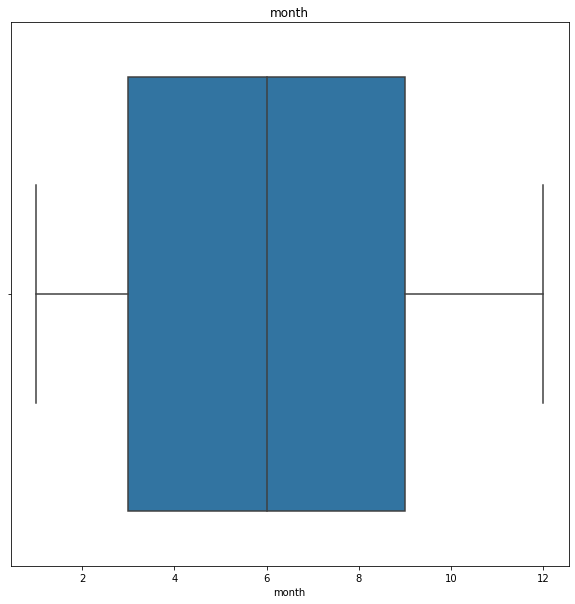

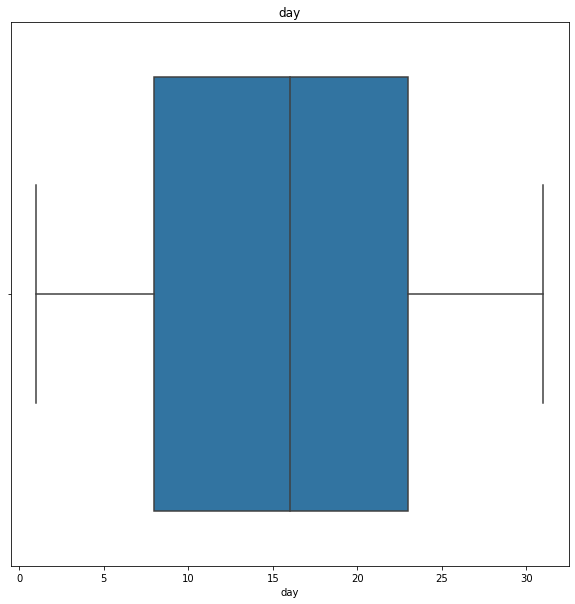

In [61]:
#checking for outliers using Box Plot:

for feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(rain[feature])
    plt.title(feature)
    

In [62]:
# checking for outliers using the statistical formulas:

rain[numerical_features].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,2012.102433,6.442136,15.741958
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020,2.473137,3.437994,8.787354
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,2008.000000,1.000000,1.000000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000,2010.000000,3.000000,8.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000,2011.000000,6.000000,16.000000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000,2014.000000,9.000000,23.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,2017.000000,12.000000,31.000000


In [63]:
# features which has outliers:

features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

In [64]:
for feature in features_with_outliers:
    q1 = rain[feature].quantile(0.25)
    q3 = rain[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    rain.loc[rain[feature]<lower_limit,feature] = lower_limit
    rain.loc[rain[feature]>upper_limit,feature] = upper_limit

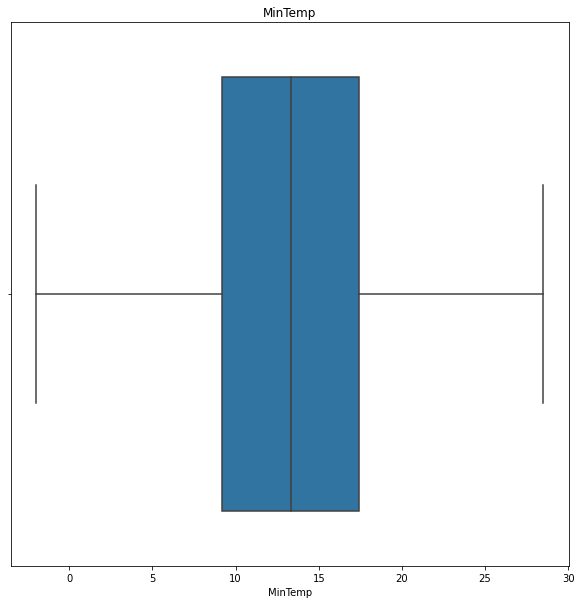

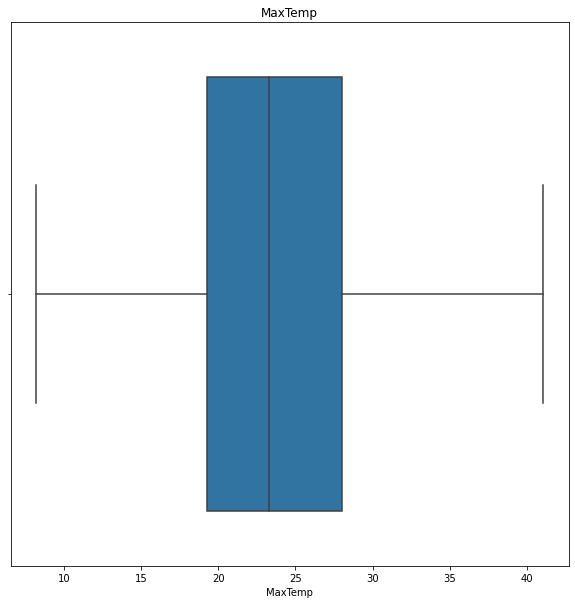

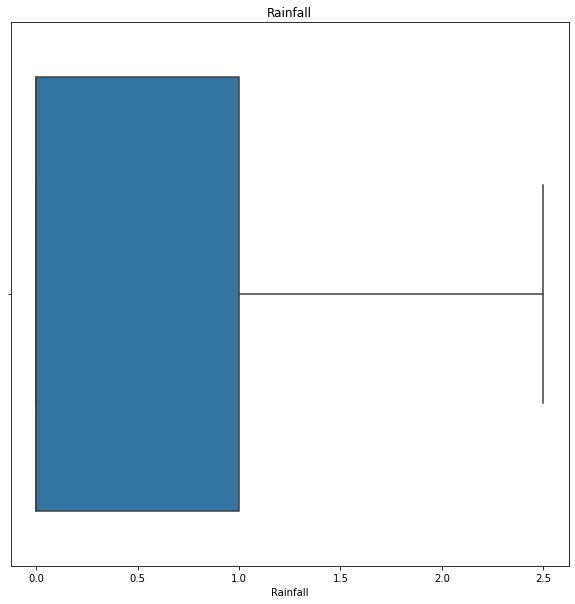

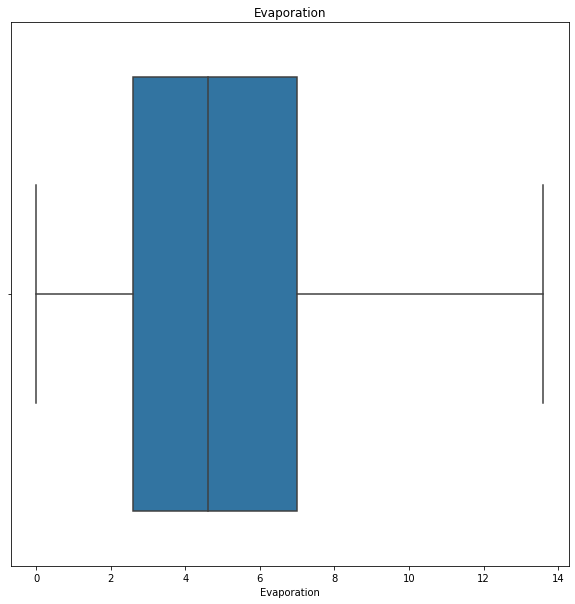

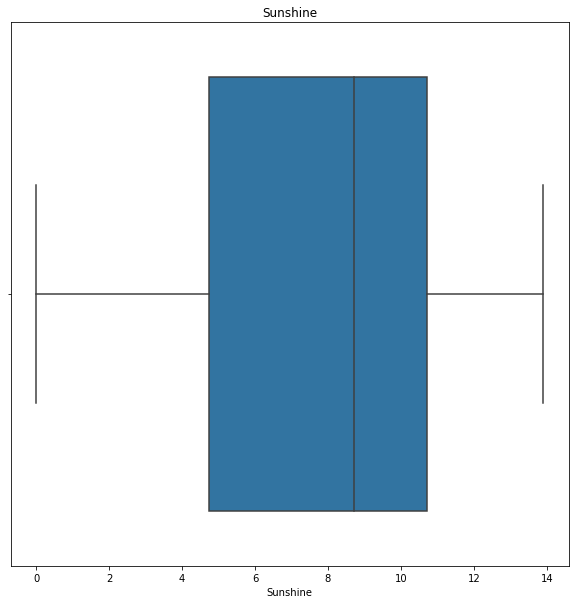

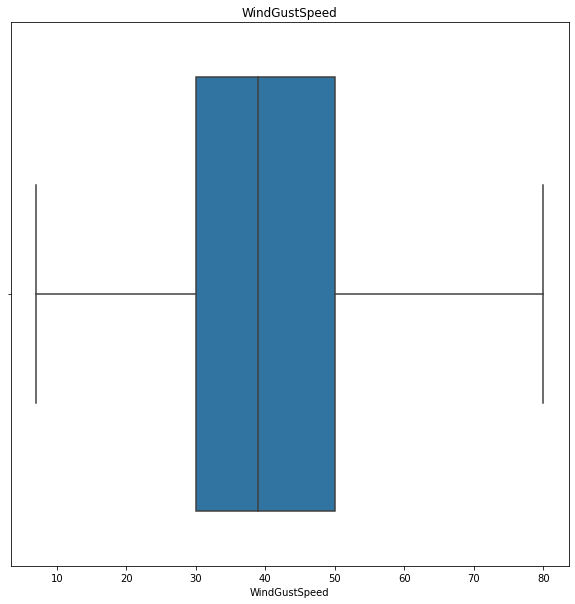

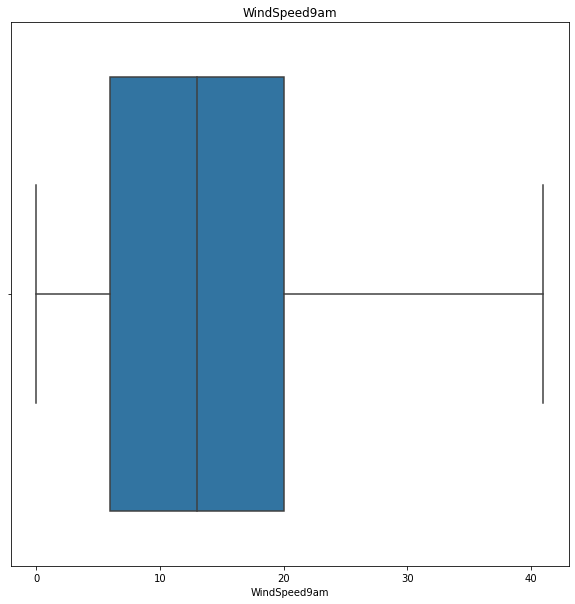

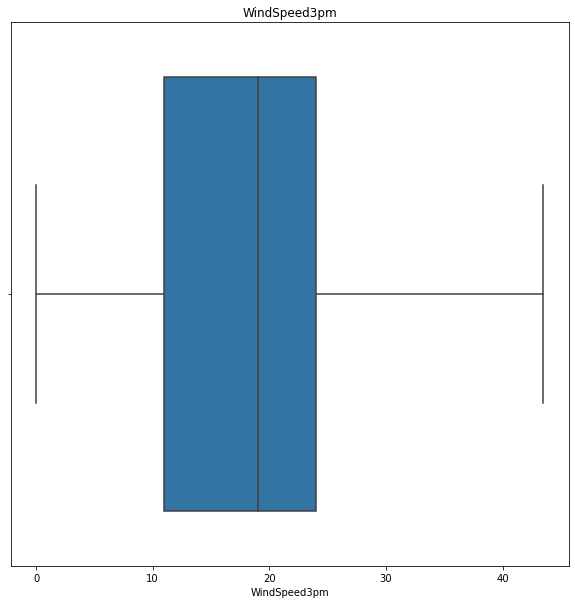

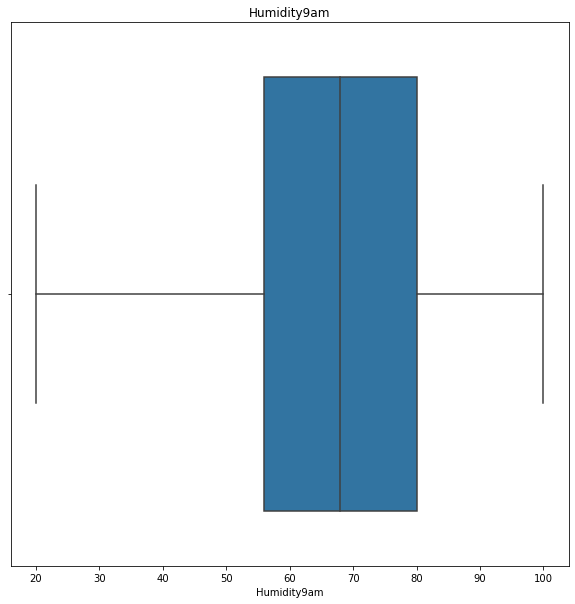

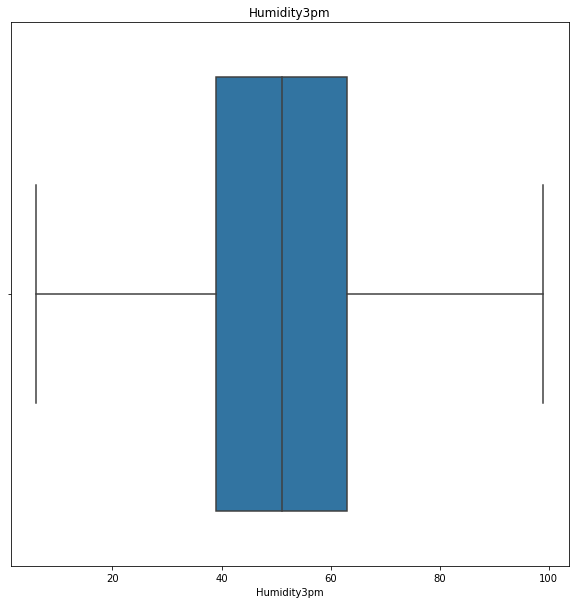

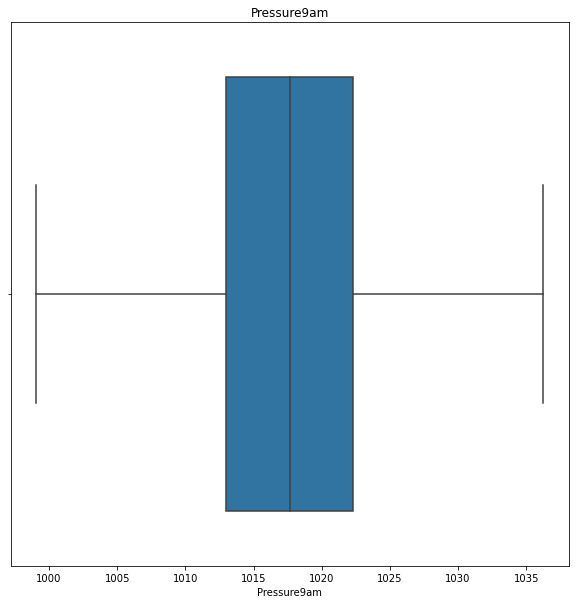

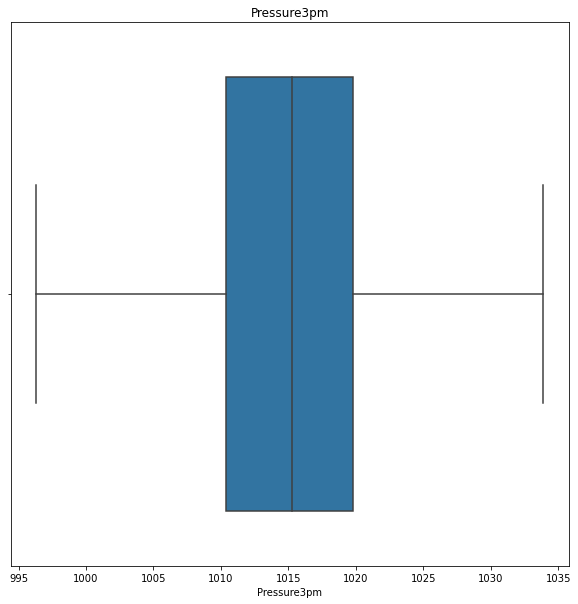

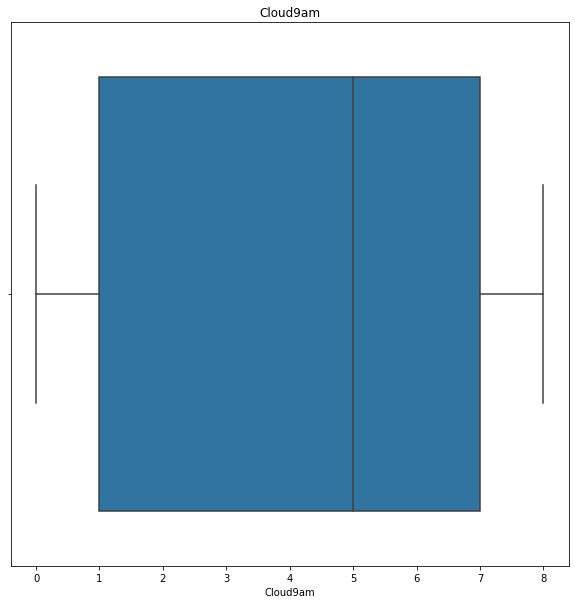

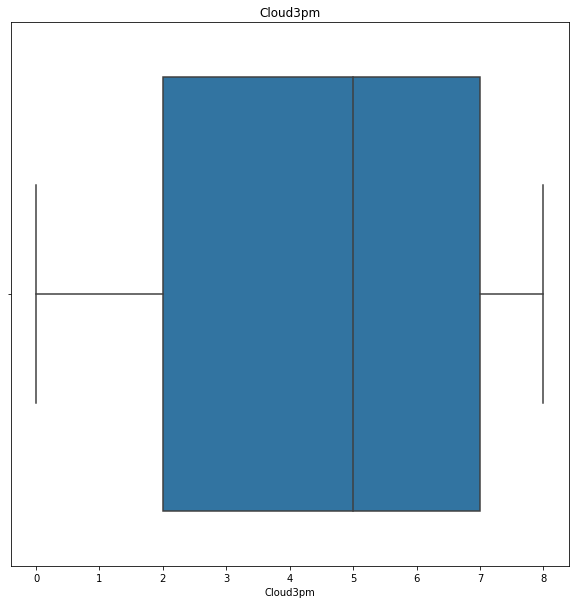

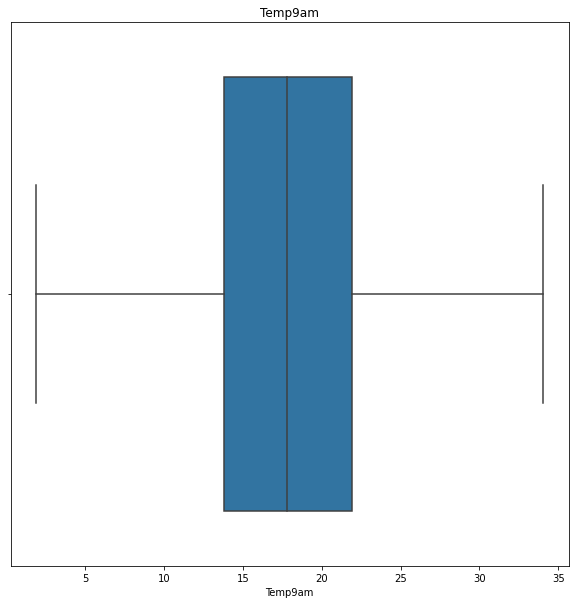

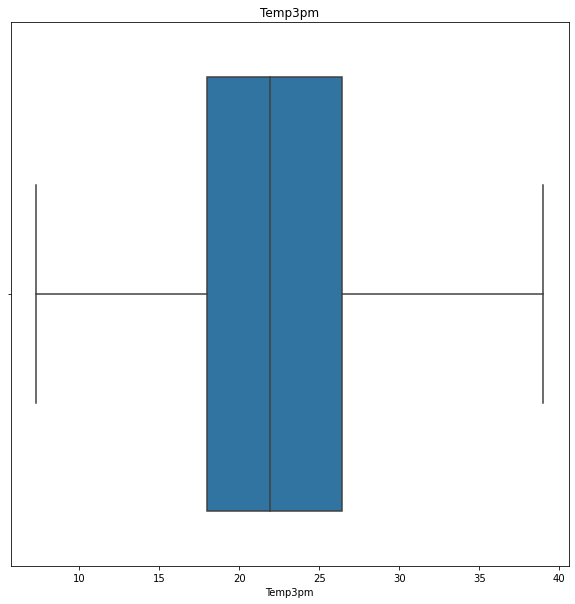

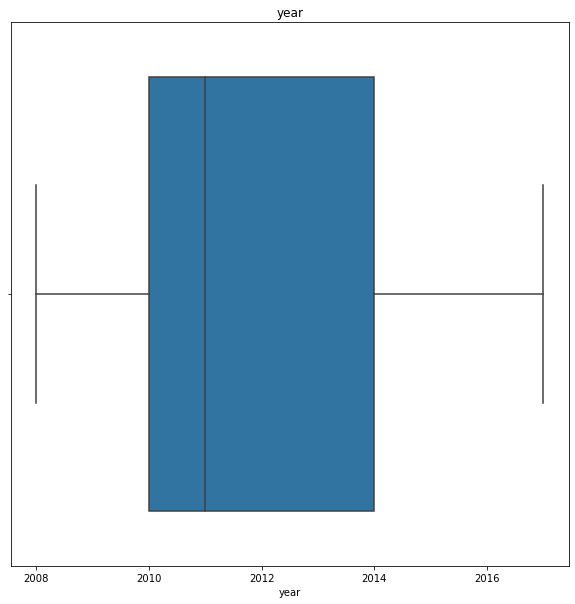

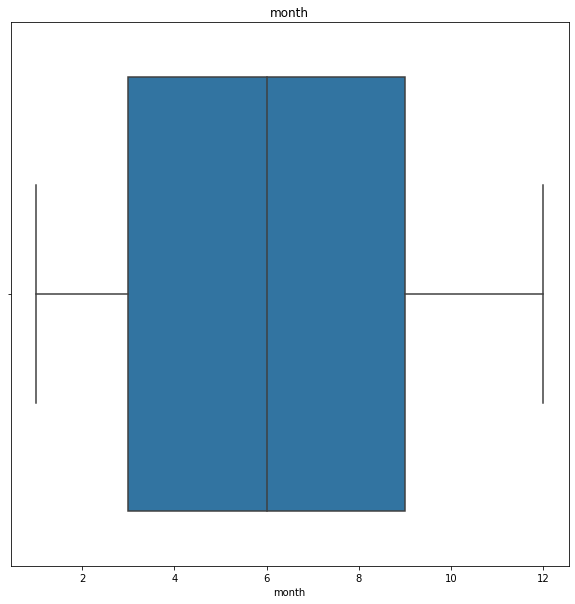

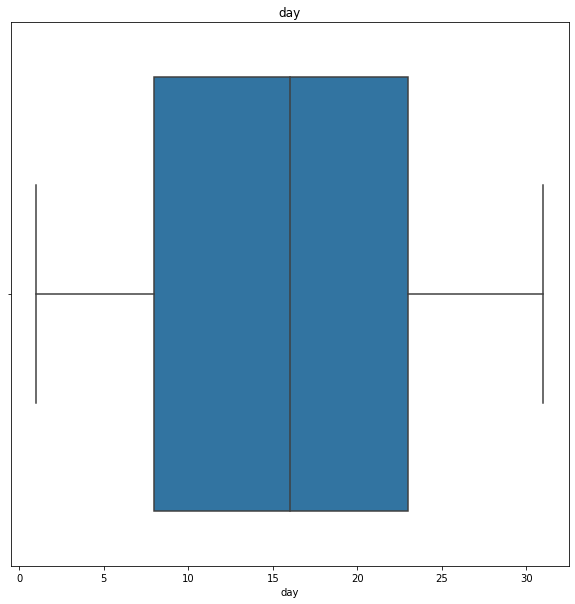

In [65]:
for feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(rain[feature])
    plt.title(feature)

In [66]:
# list of numerical Features with Null values:

numerical_features_with_null = [feature for feature in numerical_features if rain[feature].isnull().sum()]
numerical_features_with_null

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [67]:
for feature in numerical_features_with_null:
    mean_value = rain[feature].mean()
    rain[feature].fillna(mean_value,inplace=True)

In [68]:
rain.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

<AxesSubplot:>

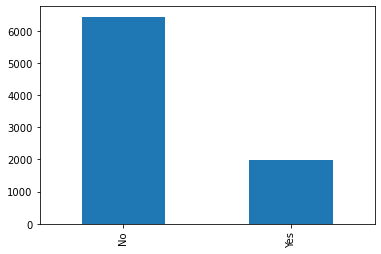

In [69]:
# Exploring RainTomorrow label

rain['RainTomorrow'].value_counts().plot(kind='bar')

Looks like Target variable is imbalanced. It has more 'No' values. If data is imbalanced, then it might decrease performance of model. As this data is released by the meteorological department of Australia, it doesn't make any sense when we try to balance target variable, because the truthfullness of data might descreases. 

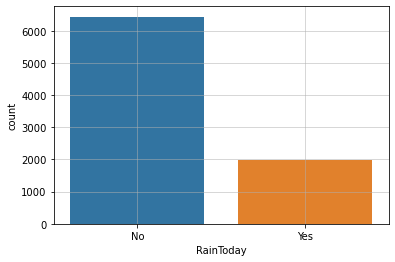

In [70]:
sns.countplot(data=rain, x="RainToday")
plt.grid(linewidth = 0.5)
plt.show()

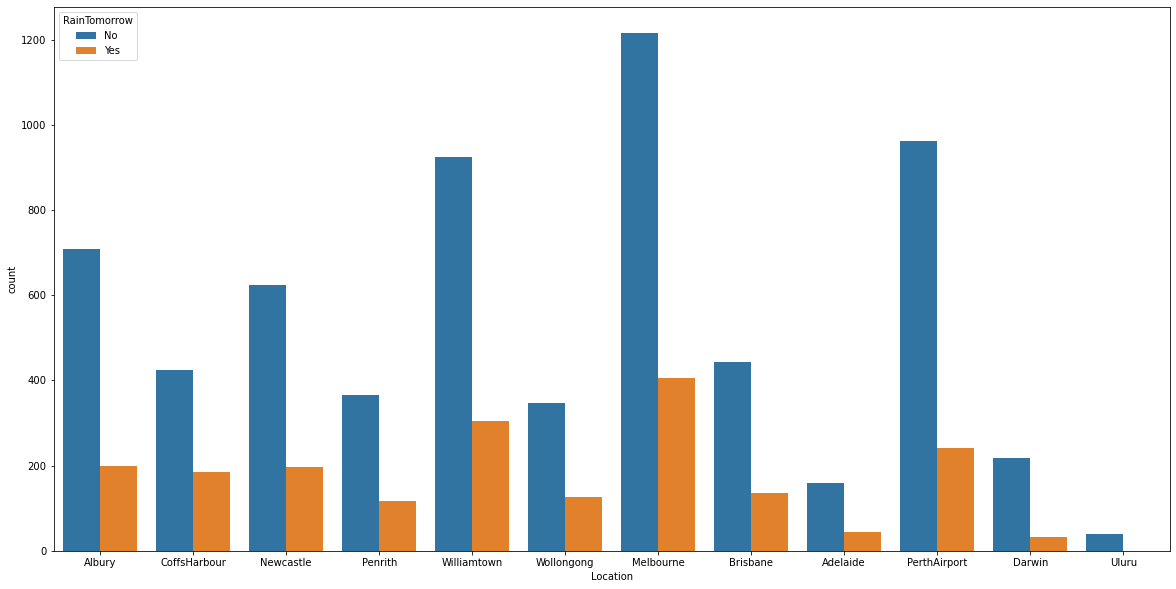

In [71]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Location", hue="RainTomorrow", data=rain)

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

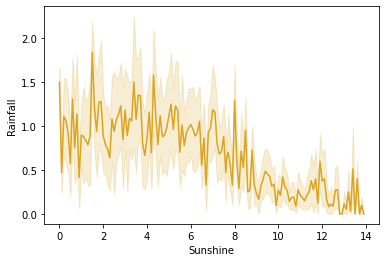

In [72]:
sns.lineplot(data=rain,x='Sunshine',y='Rainfall',color='goldenrod')

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>]], dtype=object)

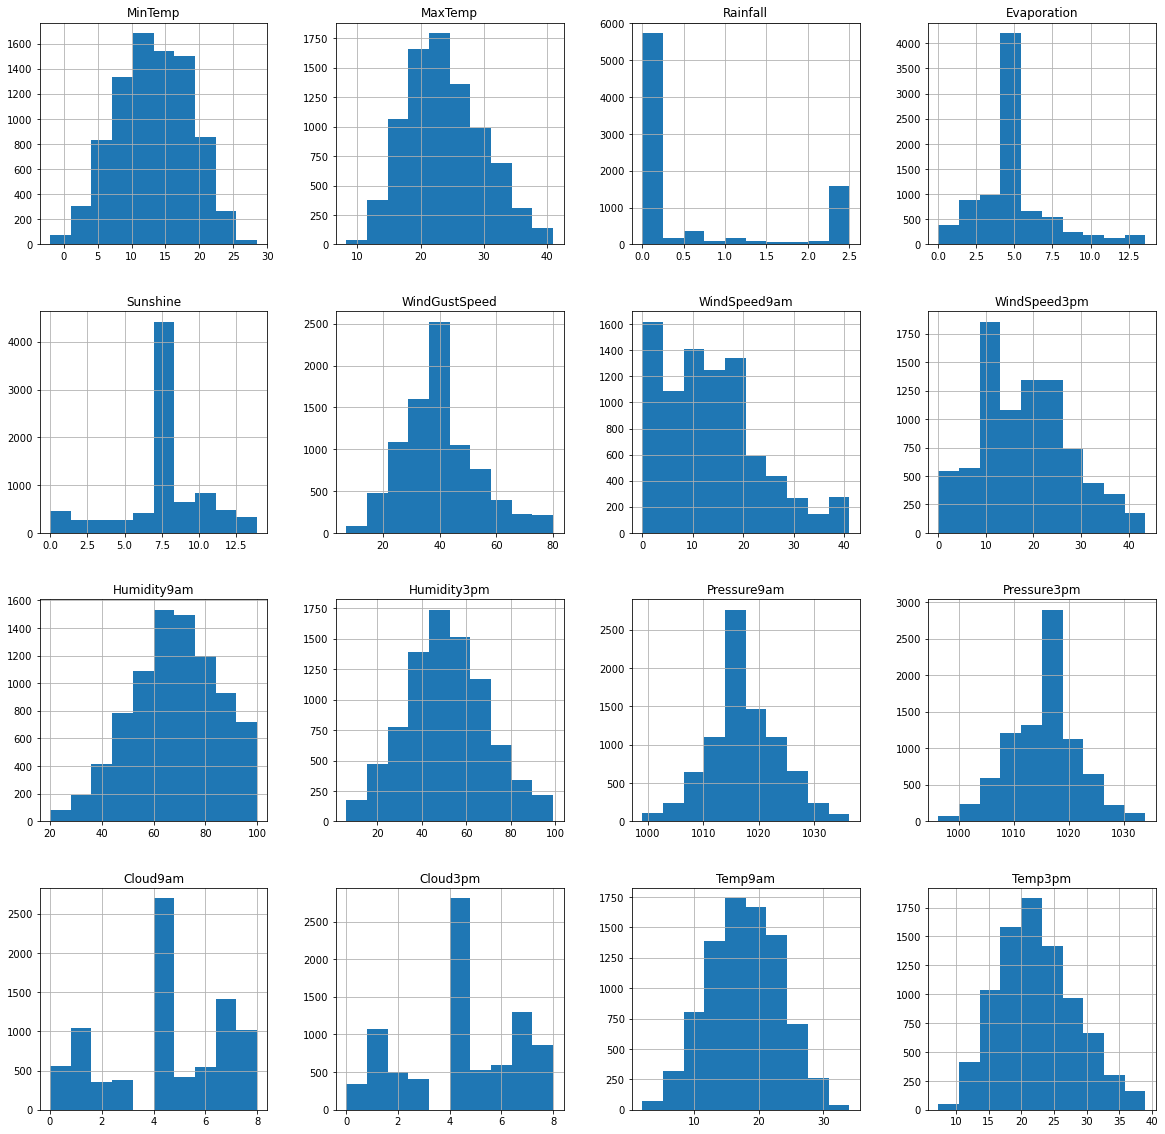

In [73]:
num_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
rain[num_features].hist(bins=10,figsize=(20,20))

In [74]:
rain.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
MinTemp,1.000000,0.718001,0.075556,0.378765,0.056184,0.232307,0.139208,0.182028,-0.130330,0.079048,-0.431617,-0.425306,0.091604,0.038414,0.887190,0.686292,0.044123,-0.245854,0.009446
MaxTemp,0.718001,1.000000,-0.235267,0.471384,0.379266,0.140585,0.011687,0.090981,-0.390515,-0.421429,-0.328197,-0.406001,-0.254414,-0.250543,0.866698,0.974538,0.119702,-0.162506,0.015722
Rainfall,0.075556,-0.235267,1.000000,-0.164845,-0.255176,0.087183,0.045306,0.027078,0.404765,0.384859,-0.117617,-0.040890,0.307582,0.263521,-0.099851,-0.245436,0.003306,0.001672,-0.017648
Evaporation,0.378765,0.471384,-0.164845,1.000000,0.346654,0.208527,0.166081,0.132428,-0.332103,-0.240127,-0.260124,-0.272803,-0.117655,-0.147804,0.450422,0.458000,0.141970,-0.037221,0.015207
Sunshine,0.056184,0.379266,-0.255176,0.346654,1.000000,-0.012151,-0.017446,0.031878,-0.360958,-0.440268,0.020120,-0.037756,-0.533391,-0.547304,0.250559,0.396694,0.065374,-0.006694,0.004662
WindGustSpeed,0.232307,0.140585,0.087183,0.208527,-0.012151,1.000000,0.601377,0.640967,-0.271939,-0.092607,-0.404907,-0.369817,0.022342,0.078299,0.204029,0.103139,-0.041851,0.050826,-0.002990
WindSpeed9am,0.139208,0.011687,0.045306,0.166081,-0.017446,0.601377,1.000000,0.564137,-0.359724,-0.108080,-0.174375,-0.135352,0.000076,0.056551,0.110262,-0.004690,-0.089078,0.038560,-0.004590
WindSpeed3pm,0.182028,0.090981,0.027078,0.132428,0.031878,0.640967,0.564137,1.000000,-0.252167,-0.089889,-0.250575,-0.205115,0.006831,0.004431,0.187655,0.068461,-0.055169,0.047180,-0.008772
Humidity9am,-0.130330,-0.390515,0.404765,-0.332103,-0.360958,-0.271939,-0.359724,-0.252167,1.000000,0.633368,0.143685,0.175286,0.405018,0.297133,-0.377312,-0.382141,0.100039,-0.115279,0.003970
Humidity3pm,0.079048,-0.421429,0.384859,-0.240127,-0.440268,-0.092607,-0.108080,-0.089889,0.633368,1.000000,0.002390,0.071555,0.424348,0.439965,-0.130367,-0.490686,-0.028920,-0.074256,0.012512


<AxesSubplot:>

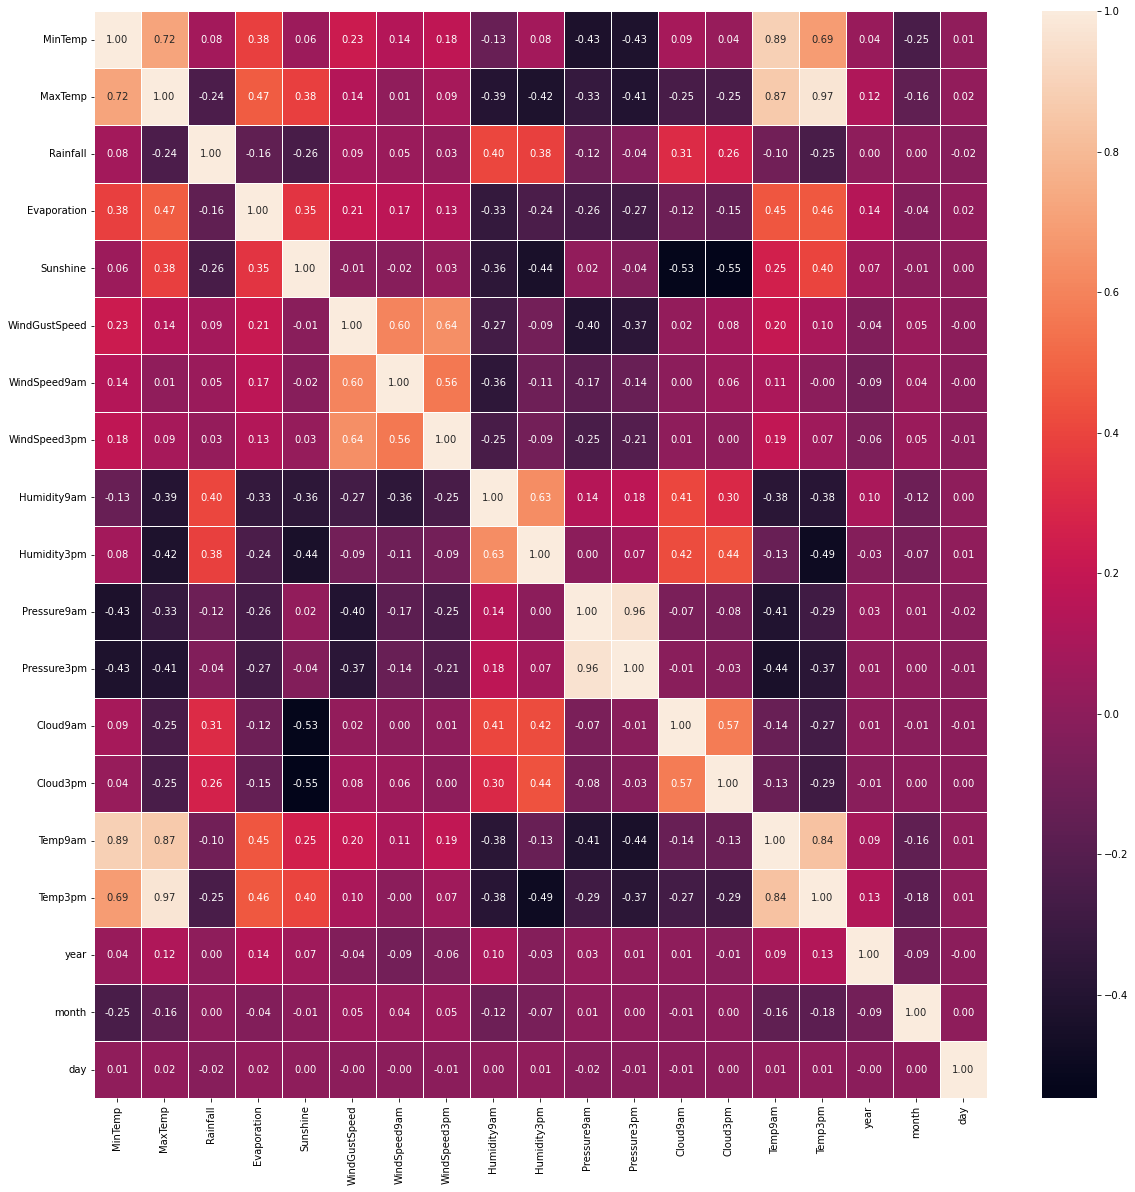

In [75]:
plt.figure(figsize=(20,20))
sns.heatmap(rain.corr(),linewidths=0.5,annot=True,fmt=".2f")

In [76]:
categorical_features

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [77]:
# Encoding Categorical Features using replace function:

rain['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

# pd.get_dummies(rain['RainToday'],drop_first = True)

rain['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

In [78]:
def encode_data(feature_name):
    
    ''' 
    
     function which takes feature name as a parameter and return mapping dictionary to replace(or map) categorical data 
     to numerical data.
     
    '''
    
    mapping_dict = {}
    unique_values = list(rain[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict

In [79]:
rain['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

{'W': 0, 'WNW': 1, 'WSW': 2, 'NE': 3, 'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 'E': 14, 'SSW': 15}


In [80]:
rain['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

{'W': 0, 'NNW': 1, 'SE': 2, 'ENE': 3, 'SW': 4, 'SSE': 5, 'S': 6, 'NE': 7, 'N': 8, 'SSW': 9, 'WSW': 10, 'ESE': 11, 'E': 12, 'NW': 13, 'WNW': 14, 'NNE': 15}


In [81]:
rain['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

{'WNW': 0, 'WSW': 1, 'E': 2, 'NW': 3, 'W': 4, 'SSE': 5, 'ESE': 6, 'ENE': 7, 'NNW': 8, 'SSW': 9, 'SW': 10, 'SE': 11, 'N': 12, 'S': 13, 'NNE': 14, 'NE': 15}


In [82]:
rain['Location'].replace(encode_data('Location'), inplace = True)

{'Albury': 0, 'CoffsHarbour': 1, 'Newcastle': 2, 'Penrith': 3, 'Williamtown': 4, 'Wollongong': 5, 'Melbourne': 6, 'Brisbane': 7, 'Adelaide': 8, 'PerthAirport': 9, 'Darwin': 10, 'Uluru': 11}


In [83]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,0,13.4,22.9,0.6,5.119906,7.632205,0,44.0,0,0,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
1,0,7.4,25.1,0.0,5.119906,7.632205,1,44.0,1,1,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2
2,0,12.9,25.7,0.0,5.119906,7.632205,2,46.0,0,1,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,2008,12,3
3,0,9.2,28.0,0.0,5.119906,7.632205,3,24.0,2,2,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,2008,12,4
4,0,17.5,32.3,1.0,5.119906,7.632205,0,41.0,3,3,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5


In [84]:
X = rain.drop(['RainTomorrow'],axis=1)
y = rain['RainTomorrow']

In [85]:
# finding feature importance using ExtraTreesRegressor:

from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)

ExtraTreesRegressor()

In [86]:
etr_model.feature_importances_

array([0.02623523, 0.02677378, 0.0279246 , 0.04407221, 0.02400584,
       0.03924935, 0.02882468, 0.05949482, 0.03131297, 0.03472779,
       0.03337772, 0.03585653, 0.03952535, 0.18666287, 0.02958073,
       0.03432664, 0.02782872, 0.07044959, 0.02685748, 0.02829843,
       0.04995571, 0.03106479, 0.02940387, 0.0341903 ])

<AxesSubplot:>

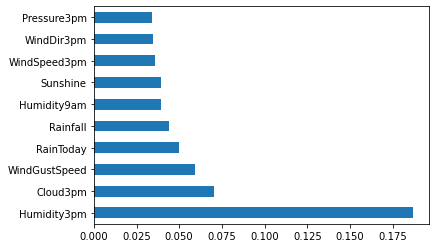

In [87]:
# visualizing feature importance using bar graph:

feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

In [88]:
feature_imp

Location         0.026235
MinTemp          0.026774
MaxTemp          0.027925
Rainfall         0.044072
Evaporation      0.024006
Sunshine         0.039249
WindGustDir      0.028825
WindGustSpeed    0.059495
WindDir9am       0.031313
WindDir3pm       0.034728
WindSpeed9am     0.033378
WindSpeed3pm     0.035857
Humidity9am      0.039525
Humidity3pm      0.186663
Pressure9am      0.029581
Pressure3pm      0.034327
Cloud9am         0.027829
Cloud3pm         0.070450
Temp9am          0.026857
Temp3pm          0.028298
RainToday        0.049956
year             0.031065
month            0.029404
day              0.034190
dtype: float64

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [90]:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 6740
Length of Testing Data: 1685


In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [92]:
X_test = scaler.transform(X_test)

In [93]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [94]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
start_time = time.time()
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(X_train, y_train)
end_time = time.time()

In [97]:
print("Time Taken to train: {}".format(end_time - start_time))

Time Taken to train: 0.5881264209747314


In [98]:
y_pred = classifier_logreg.predict(X_test)

In [99]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [100]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.8367952522255193


In [101]:
print("Train Data Score: {}".format(classifier_logreg.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_logreg.score(X_test, y_test)))

Train Data Score: 0.8302670623145401
Test Data Score: 0.8367952522255193


Accuracy Score of Training and Testing Data is comparable and almost equal. So, there is no question of Underfitting and Over Fitting. And model is generalizing well for new unseen data.

In [102]:
# confusion Matrix:

print("Confusion Matrix:")
print("\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:

 [[1203   83]
 [ 192  207]]


In [103]:
# Classification Report:

print("classification_report:")
print("\n",classification_report(y_test,y_pred))

classification_report:

               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1286
           1       0.71      0.52      0.60       399

    accuracy                           0.84      1685
   macro avg       0.79      0.73      0.75      1685
weighted avg       0.83      0.84      0.83      1685



In [104]:
# predicting probabilities:

y_pred_logreg_proba = classifier_logreg.predict_proba(X_test)

In [105]:
# Finding True Positive Rate(tpr), False Positive Rate(fpr), threshold values to plot ROC curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])

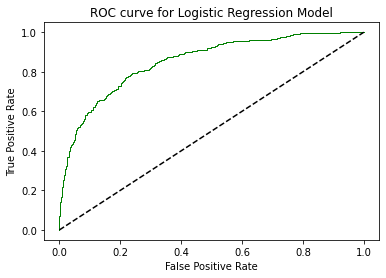

In [106]:
# Plotting ROC curve:

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [107]:
# finding ROC-AUC score:

from sklearn.metrics import roc_auc_score
print('ROC AUC Scores: {}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC Scores: 0.7271278897087198


In [108]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.82937685 0.83456973 0.83308605 0.83679525 0.81973294]


In [109]:
print('Average cross-validation score: {}'.format(scores.mean()))

Average cross-validation score: 0.8307121661721067


In [110]:
from catboost import CatBoostClassifier

In [111]:
start_time = time.time()
cat_classifier = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat_classifier.fit(X_train, y_train)
end_time = time.time()

Learning rate set to 0.012323
0:	total: 380ms	remaining: 12m 38s
1:	total: 391ms	remaining: 6m 30s
2:	total: 401ms	remaining: 4m 27s
3:	total: 411ms	remaining: 3m 25s
4:	total: 421ms	remaining: 2m 48s
5:	total: 432ms	remaining: 2m 23s
6:	total: 442ms	remaining: 2m 5s
7:	total: 452ms	remaining: 1m 52s
8:	total: 463ms	remaining: 1m 42s
9:	total: 474ms	remaining: 1m 34s
10:	total: 484ms	remaining: 1m 27s
11:	total: 495ms	remaining: 1m 22s
12:	total: 507ms	remaining: 1m 17s
13:	total: 518ms	remaining: 1m 13s
14:	total: 531ms	remaining: 1m 10s
15:	total: 542ms	remaining: 1m 7s
16:	total: 557ms	remaining: 1m 4s
17:	total: 571ms	remaining: 1m 2s
18:	total: 584ms	remaining: 1m
19:	total: 599ms	remaining: 59.3s
20:	total: 610ms	remaining: 57.5s
21:	total: 622ms	remaining: 55.9s
22:	total: 633ms	remaining: 54.4s
23:	total: 645ms	remaining: 53.1s
24:	total: 655ms	remaining: 51.8s
25:	total: 666ms	remaining: 50.5s
26:	total: 676ms	remaining: 49.4s
27:	total: 687ms	remaining: 48.4s
28:	total: 697ms

In [112]:
print("Time Taken to train: {}".format(end_time - start_time))

Time Taken to train: 35.639952421188354


In [113]:
y_pred_cat = cat_classifier.predict(X_test)

In [114]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred_cat)))

Accuracy Score: 0.8908011869436202


In [115]:
print("Train Data Score: {}".format(cat_classifier.score(X_train, y_train)))
print("Test Data Score: {}".format(cat_classifier.score(X_test, y_test)))

Train Data Score: 0.9534124629080118
Test Data Score: 0.8908011869436202


In [116]:
# Confusion Matrix:

print("Confusion Matrix:")
print("\n",confusion_matrix(y_test,y_pred_cat))

Confusion Matrix:

 [[1234   52]
 [ 132  267]]


In [117]:
# classification Report:

print("classification_report:")
print("\n",classification_report(y_test,y_pred_cat))

classification_report:

               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1286
           1       0.84      0.67      0.74       399

    accuracy                           0.89      1685
   macro avg       0.87      0.81      0.84      1685
weighted avg       0.89      0.89      0.89      1685



In [118]:
# predicting the probabilities:

y_pred_cat_proba = cat_classifier.predict_proba(X_test)

In [119]:
# Finding True Positive Rate(tpr), False Positive Rate(fpr), threshold values to plot ROC curve  

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_cat_proba[:,1])

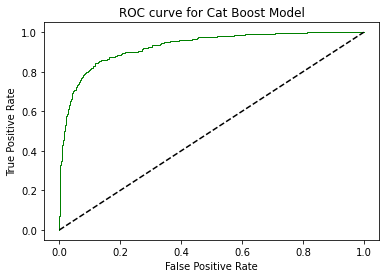

In [120]:
# plotting ROC Curve:

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Cat Boost Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [122]:
#finding ROC AUC Scores:

from sklearn.metrics import roc_auc_score
print('ROC AUC Scores: {}'.format(roc_auc_score(y_test, y_pred_cat)))

ROC AUC Scores: 0.8143687367719454


In [123]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(cat_classifier, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Learning rate set to 0.011203
0:	total: 12.2ms	remaining: 24.4s
1:	total: 21.5ms	remaining: 21.5s
2:	total: 30.9ms	remaining: 20.6s
3:	total: 40.3ms	remaining: 20.1s
4:	total: 49.8ms	remaining: 19.9s
5:	total: 59.3ms	remaining: 19.7s
6:	total: 68.7ms	remaining: 19.6s
7:	total: 77.9ms	remaining: 19.4s
8:	total: 87.5ms	remaining: 19.3s
9:	total: 96.8ms	remaining: 19.3s
10:	total: 106ms	remaining: 19.3s
11:	total: 116ms	remaining: 19.2s
12:	total: 125ms	remaining: 19.1s
13:	total: 135ms	remaining: 19.2s
14:	total: 145ms	remaining: 19.1s
15:	total: 154ms	remaining: 19.1s
16:	total: 163ms	remaining: 19s
17:	total: 175ms	remaining: 19.3s
18:	total: 187ms	remaining: 19.5s
19:	total: 201ms	remaining: 19.9s
20:	total: 212ms	remaining: 20s
21:	total: 222ms	remaining: 19.9s
22:	total: 233ms	remaining: 20s
23:	total: 243ms	remaining: 20s
24:	total: 252ms	remaining: 19.9s
25:	total: 262ms	remaining: 19.9s
26:	total: 272ms	remaining: 19.9s
27:	total: 282ms	remaining: 19.8s
28:	total: 292ms	remaining

In [124]:
print('Average cross-validation score: {}'.format(scores.mean()))

Average cross-validation score: 0.8734421364985163


In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
start_time = time.time()
classifier_rf=RandomForestClassifier()
classifier_rf.fit(X_train,y_train)
end_time = time.time()

In [127]:
print("Time Taken to train: {}".format(end_time - start_time))

Time Taken to train: 3.143979549407959


In [128]:
y_pred_rf = classifier_rf.predict(X_test)

In [129]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred_rf)))

Accuracy Score: 0.9008902077151335


In [130]:
print("Train Data Score: {}".format(classifier_rf.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_rf.score(X_test, y_test)))

Train Data Score: 1.0
Test Data Score: 0.9008902077151335


In [131]:
with open('logreg.pkl', 'wb') as file:
    pickle.dump(classifier_logreg, file)

In [132]:
with open('catboostclassifier.pkl', 'wb') as file:
    pickle.dump(cat_classifier, file)